## 0. Code Setup and Helper Functions

### 0.1 Import all necessary packages

In [1]:
import os
import zlib
import pickle as pkl
import sklearn
import pandas as pd
from tabulate import tabulate
from top2vec import Top2Vec

### 0.2 Path Adjustments

In [2]:
assert os.path.exists('../src'), f"[ERROR] The path src not detected in the parent directory '{os.getcwd()}'."

if os.getcwd().endswith('/notebooks'):
    os.chdir('../src')

print(f'[INFO] Current Directory: "{os.getcwd()}".')

[INFO] Current Directory: "/home/iceking/Desktop/22SS-TUM Lecture Docs/3. Praktikum (IN2106, IN4249)/Repo/topic-modeling-advancements/src".


## 1. Main Part

In [17]:
import src.top2vec_runner as top2vec_runner 

# Alternatives: ['doc2vec', 'universal-sentence-encoder', 'universal-sentence-encoder-large',
# 'universal-sentence-encoder-multilingual', 'universal-sentence-encoder-multilingual-large',
# 'distiluse-base-multilingual-cased', 'all-MiniLM-L6-v2', 'paraphrase-multilingual-MiniLM-L12-v2']
args = {
    'dataset_dir': '../data/crisis_resource_01_labeled_by_paid_workers',
    'data_col': 'tweet_text',
    # 'dataset_dir': './data/crisis_resource_12_labeled_by_paid_workers',
    # 'data_col': 'text',
    # 'dataset_dir': './data/20news_bydate',
    'speed': 'learn',  # Options: ['fast-learn', 'learn', 'deep-learn']
    'embedding_model': 'doc2vec',
    #'num_topics': 4,  # Options: None or integer
}
t2v_model, topic_stats = top2vec_runner.run(**args)

2022-06-07 15:55:25,691 - top2vec - INFO - Pre-processing documents for training


[INFO] Top2Vec Parameters:
    > Input Dataset Directory:"../data/crisis_resource_01_labeled_by_paid_workers".
    > Input Dataset Data Column:"tweet_text".
    > Model Speed:"learn".
    > Model Embedding Model:doc2vec.
    > Pre-specified Number of Topics:None.
[INFO] Top2Vec is running for dataset directory:"../data/crisis_resource_01_labeled_by_paid_workers".


2022-06-07 15:55:26,693 - top2vec - INFO - Creating joint document/word embedding


KeyboardInterrupt: 

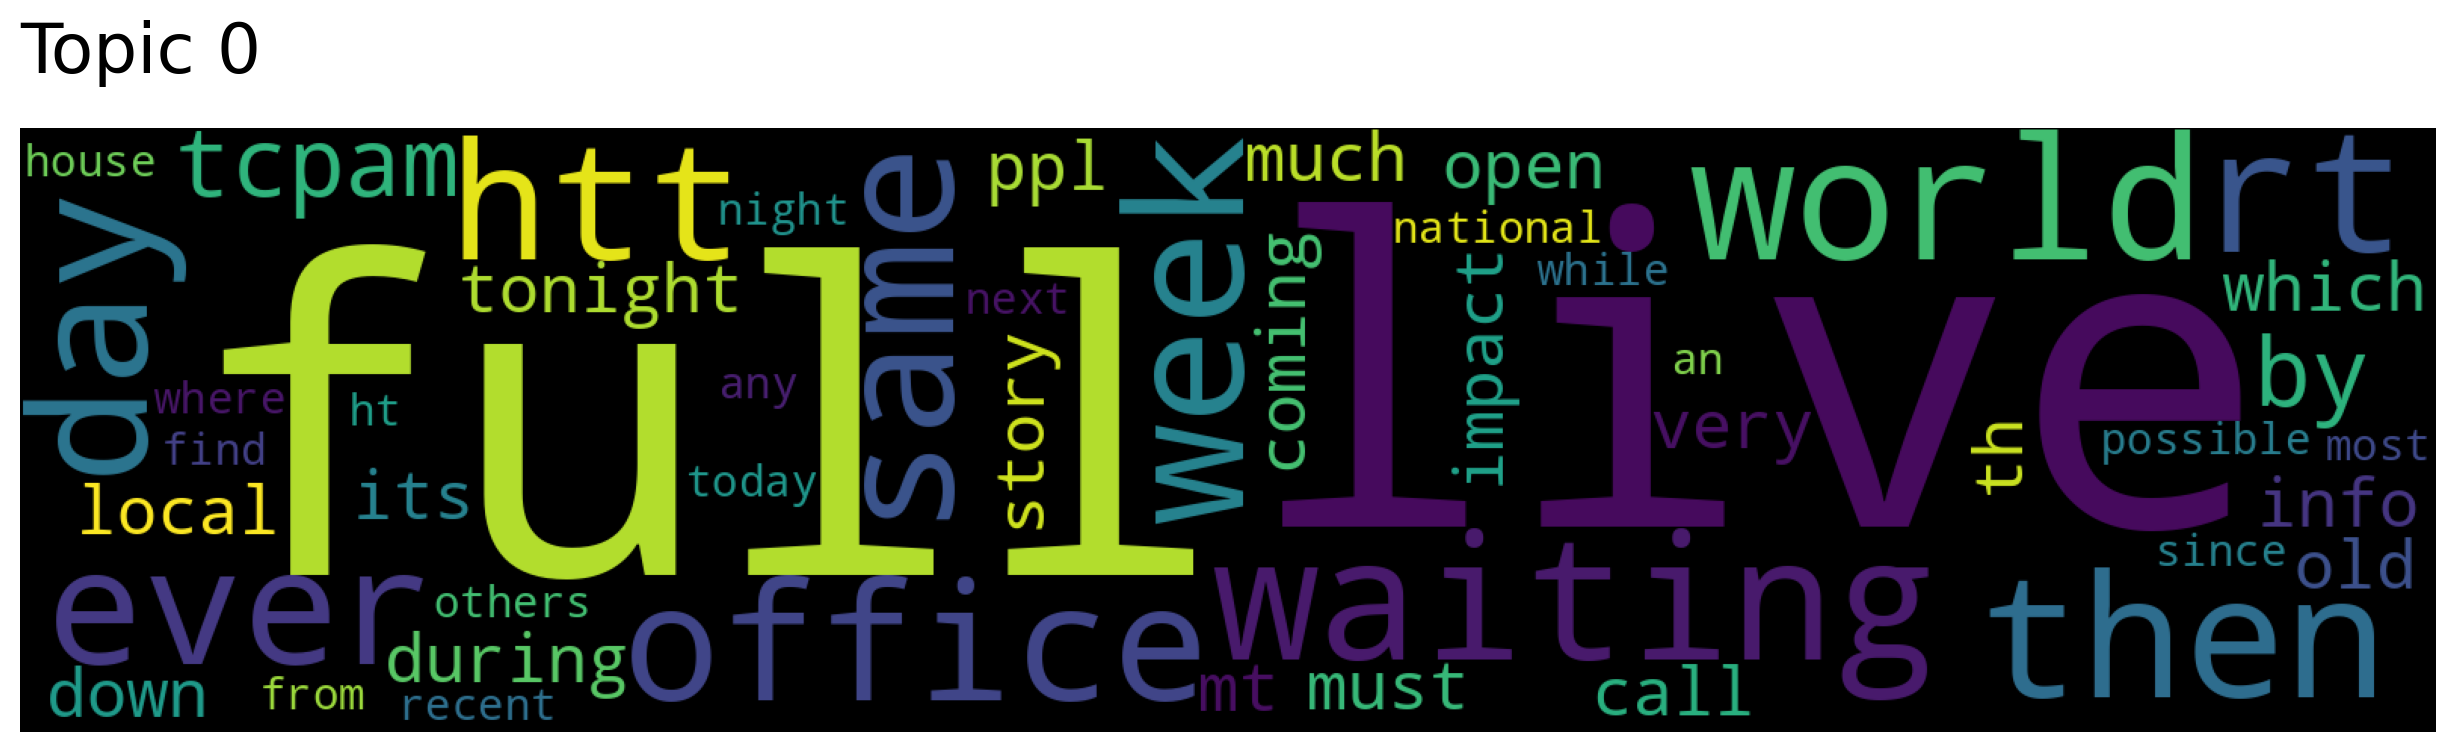

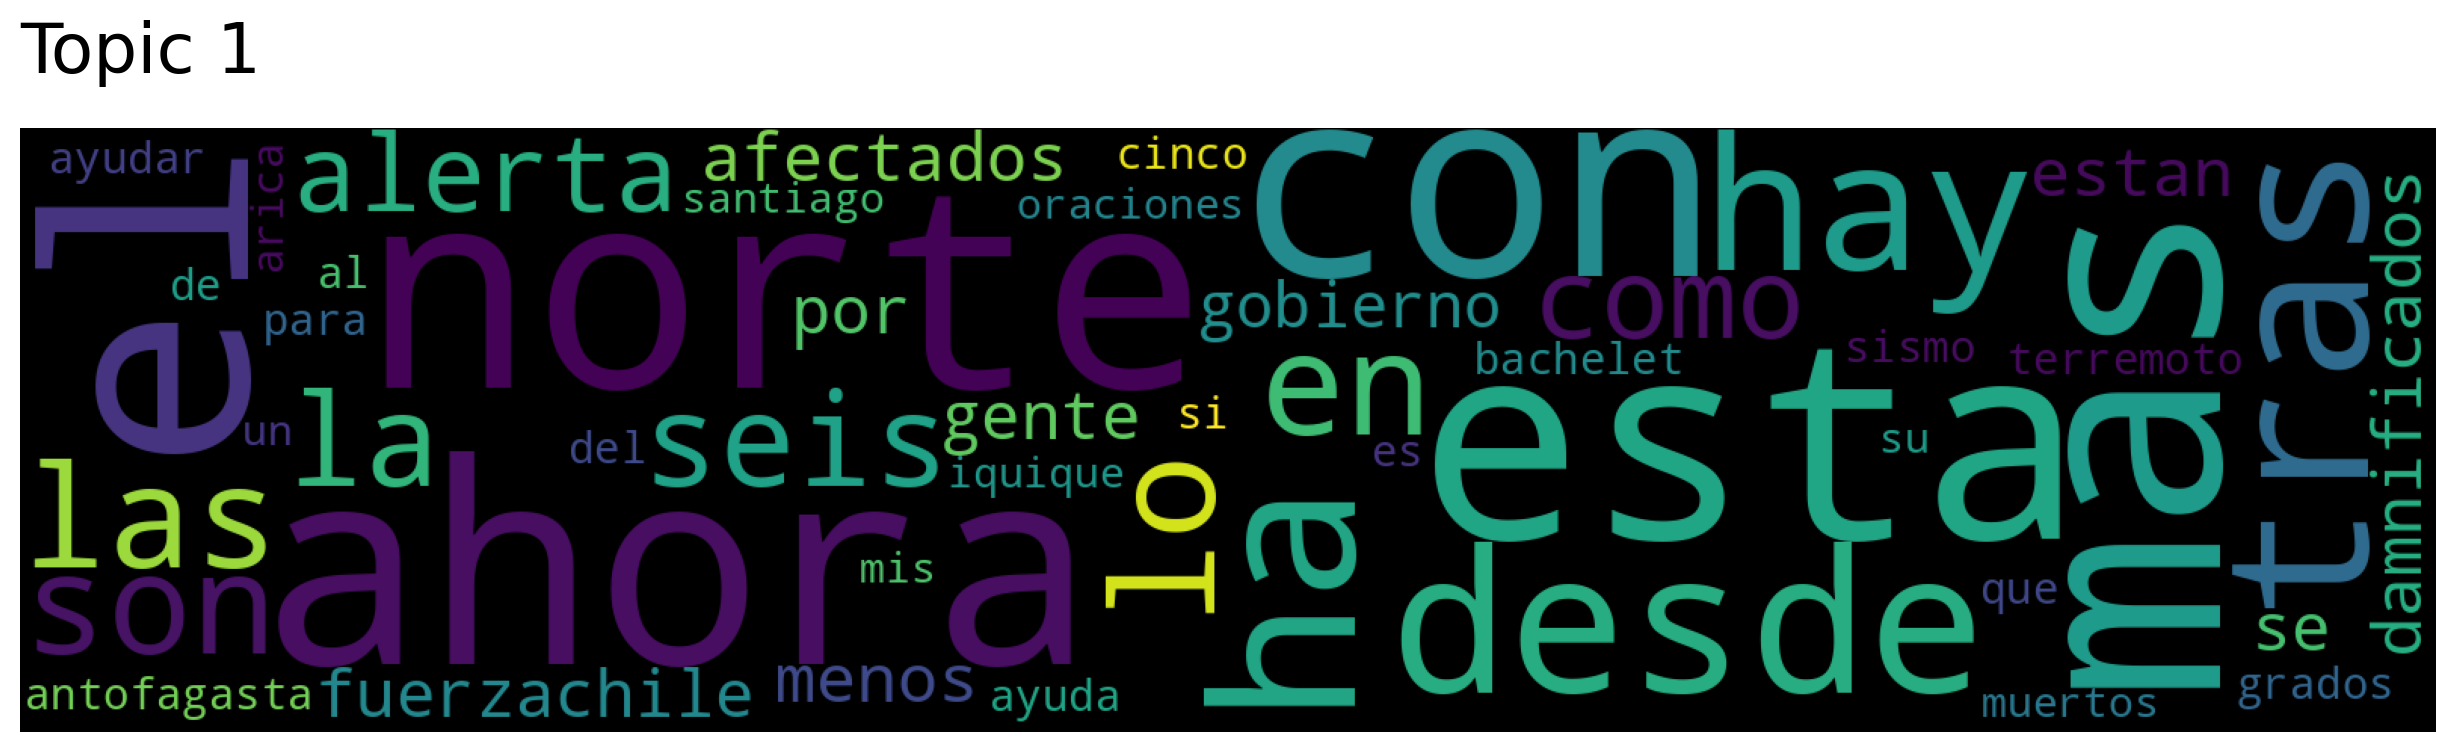

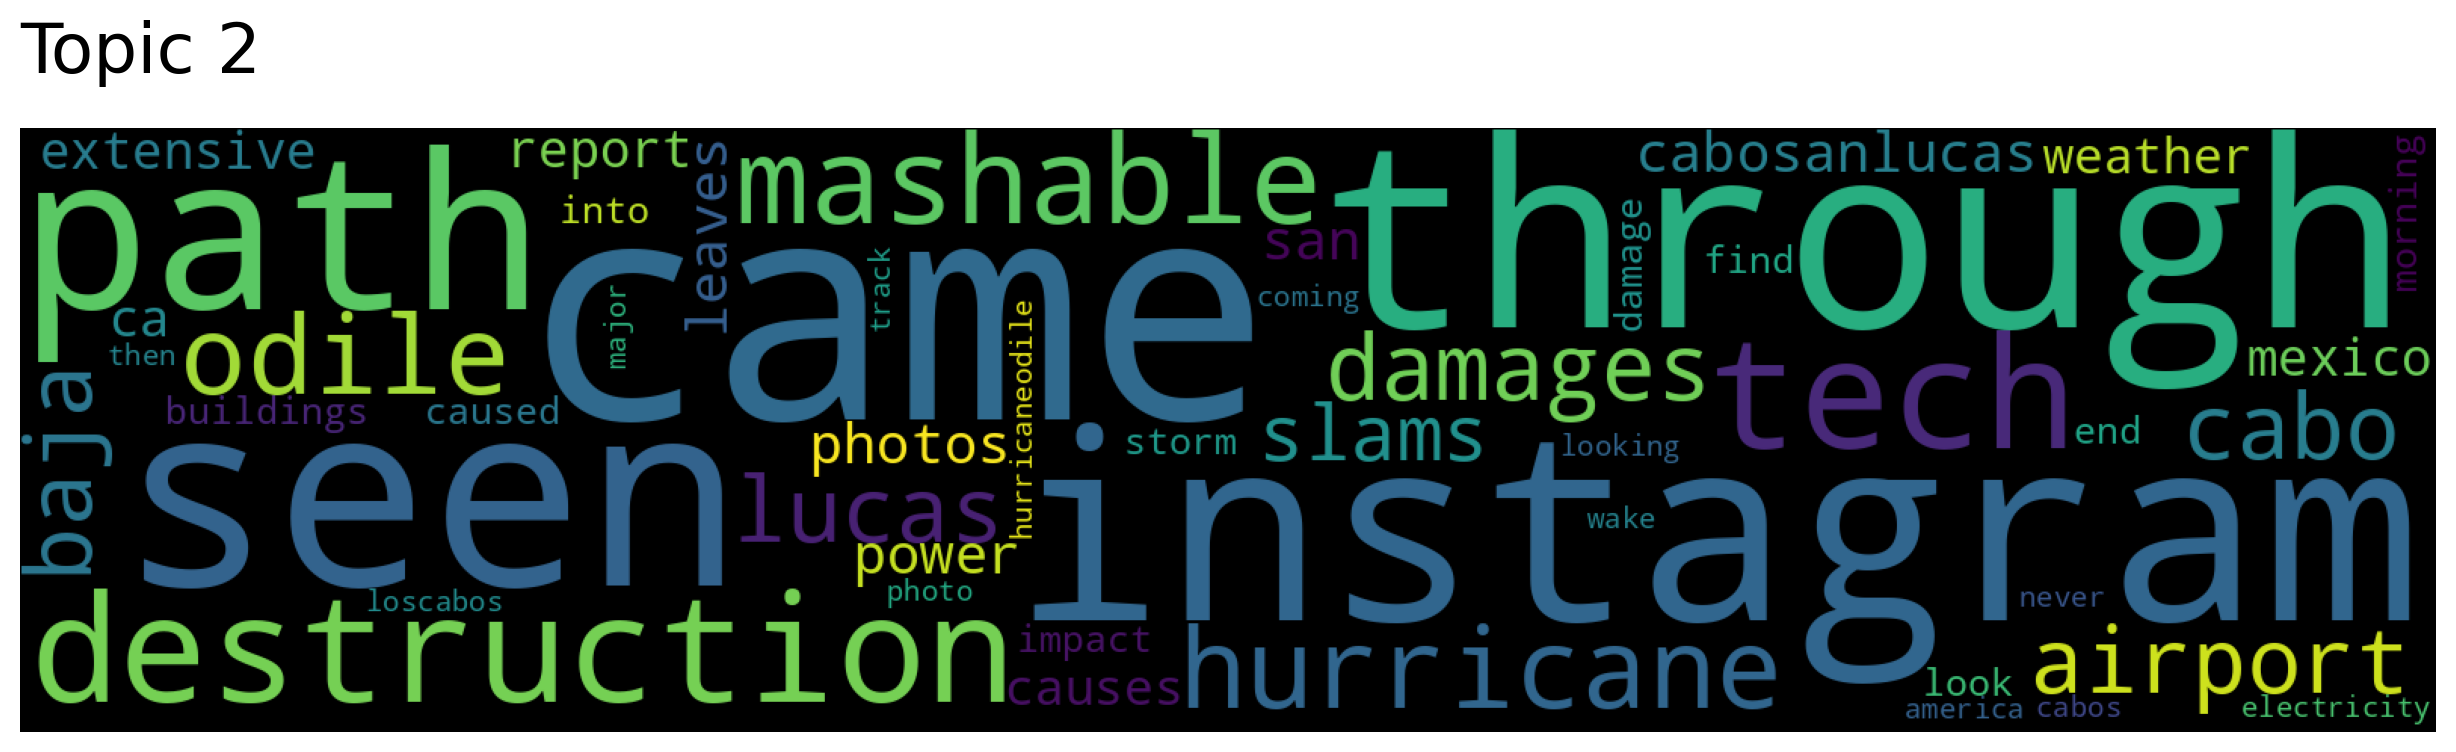

In [5]:
for topic_stat in topic_stats:
    t2v_model.generate_topic_wordcloud(topic_stat['topic_num'])

## Some tryings for eval

In [3]:
from top2vec_runner import print_params, print_topic_stats, get_topic_stats,load_documents

In [36]:
#data_col= 'text'
#dataset_dir= '../data/crisis_resource_12_labeled_by_paid_workers'
dataset_dir= '../data/20news_bydate'
#data_col= 'text'
speed= 'fast-learn'  # Options: ['fast-learn', 'learn', 'deep-learn']
embedding_model= 'doc2vec'
num_topics= 4  # Options: None or integer

In [37]:
print_params(dataset_dir, speed, embedding_model, num_topics, data_col)
print(f'[INFO] Top2Vec is running for dataset directory:"{dataset_dir}".')

documents = load_documents(dataset_dir, data_col)

[INFO] Top2Vec Parameters:
    > Input Dataset Directory:"../data/20news_bydate".
    > Input Dataset Data Column:"text".
    > Model Speed:"fast-learn".
    > Model Embedding Model:doc2vec.
    > Pre-specified Number of Topics:4.
[INFO] Top2Vec is running for dataset directory:"../data/20news_bydate".


In [38]:
import time
from collections import OrderedDict
from pathlib import Path

In [39]:
t0 = time.time()
model = Top2Vec(documents, speed=speed, workers=8, embedding_model=embedding_model)
duration_secs = float('%.3f' % (time.time() - t0))

non_reduced_num_topics = model.get_num_topics(reduced=False)
print(f'[INFO] Original (Non-reduced) Number of Topics: {non_reduced_num_topics}.')
topic_stats = get_topic_stats(model_t2v=model, is_reduced=False)
if num_topics is not None:
    if non_reduced_num_topics > num_topics:
        model.hierarchical_topic_reduction(num_topics=num_topics)
        topic_stats = get_topic_stats(model_t2v=model, is_reduced=True)
    else:
        print('[WARN] # of topics is pre-specified but non_reduced_num_topics <= num_topics, so not reduced!')
        print(f'   > non_reduced_num_topics:{non_reduced_num_topics}, given num_topics:{num_topics}!')
        time.sleep(3)
print_topic_stats(stats=topic_stats)

print(f'[INFO] Top2Vec successfully terminated for data:"{dataset_dir}".')

2022-06-07 17:20:21,625 - top2vec - INFO - Pre-processing documents for training
2022-06-07 17:20:27,913 - top2vec - INFO - Creating joint document/word embedding
2022-06-07 17:24:04,422 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-07 17:24:14,684 - top2vec - INFO - Finding dense areas of documents
2022-06-07 17:24:15,063 - top2vec - INFO - Finding topics


[INFO] Original (Non-reduced) Number of Topics: 93.
[INFO] Topic #00:
     > From Reduced Model:True.
     > Topic Size:4971.
     > Topic Words: ['qax' 'bhjn' 'sc_' 'nrhj' 'x_s' 'giz' 'gizw' 'pmf' 'fq' 'ghj' 'bxn' 'nuy'
		 'mov' 'ei' 'bhj' 'ax' 'fyn' 'gk' 'y_' 'rlk' 'yx' 'fij' 'dodgers' 'they'
		 'chz' 'zd' 'dividian' 'recchi' 'kn' 'qq' 'moncton' 'lyuda' 'nyr' 'season'
		 'uy' 'playoffs' 'team' 'who' 'pitching' 'yf' 'detroit' 'him' 'going' 'ey'
		 'qy' 'tq' 'karina' 'bq' 'ql' 'nyi']
     > Topic Word Scores: [0.39753762 0.3973352  0.39385596 0.39355513 0.39225385 0.3915523
		 0.3875391  0.38691884 0.38612184 0.38126683 0.37811247 0.37806183
		 0.37616706 0.3748185  0.37317723 0.37000212 0.36723116 0.36673155
		 0.36540857 0.36247852 0.36160308 0.3615961  0.3499311  0.34948993
		 0.34589118 0.34408936 0.3409719  0.3388161  0.33869654 0.33787364
		 0.3377129  0.33658206 0.3362885  0.33590776 0.33565453 0.3341701
		 0.33405295 0.33260936 0.33198953 0.3292451  0.32912785 0.3282139
		 0.32

In [41]:
######## START ###########

In [43]:
parameters_df = pd.DataFrame([OrderedDict([
    ('ID','21847219847'), # It will be changed
    ('method','top2vec'),
    ('method_specific_params',{'speed':speed,'embedding_model':embedding_model}),
    ('dataset_name',Path(dataset_dir).name),
    ('data_col',data_col),
    ('num_given_topics',num_topics),
])] * len(topic_stats))

In [44]:
result_metrics_df = pd.DataFrame([OrderedDict([
    ('num_detected_topics',non_reduced_num_topics),
    ('num_final_topics',len(topic_stats)),
    ('duration_secs',duration_secs),
])] * len(topic_stats))

In [50]:
df = pd.concat([parameters_df,pd.DataFrame(topic_stats),result_metrics_df],axis=1)

In [51]:
with pd.option_context('display.max_colwidth', 100):
    display(df)

,ID,method,method_specific_params,dataset_name,data_col,num_given_topics,reduced,topic_num,topic_size,topic_words,word_scores,num_detected_topics,num_final_topics,duration_secs
0,21847219847,top2vec,"{'speed': 'fast-learn', 'embedding_model': 'doc2vec'}",20news_bydate,text,4,True,0,4971,"[qax, bhjn, sc_, nrhj, x_s, giz, gizw, pmf, fq, ghj, bxn, nuy, mov, ei, bhj, ax, fyn, gk, y_, rl...","[0.39753762, 0.3973352, 0.39385596, 0.39355513, 0.39225385, 0.3915523, 0.3875391, 0.38691884, 0....",93,4,233.669
1,21847219847,top2vec,"{'speed': 'fast-learn', 'embedding_model': 'doc2vec'}",20news_bydate,text,4,True,1,2622,"[pc, thanks, card, drive, controller, ram, disk, video, mb, board, shipping, motherboard, bios, ...","[0.4887769, 0.47146326, 0.4602876, 0.45901933, 0.45448658, 0.45088804, 0.4500842, 0.44141877, 0....",93,4,233.669
2,21847219847,top2vec,"{'speed': 'fast-learn', 'embedding_model': 'doc2vec'}",20news_bydate,text,4,True,2,1938,"[windows, ftp, files, thanks, server, image, graphics, program, format, xmu, directory, pc, vers...","[0.51689106, 0.50897276, 0.49143007, 0.4746248, 0.47133732, 0.46776146, 0.46334288, 0.46281755, ...",93,4,233.669
3,21847219847,top2vec,"{'speed': 'fast-learn', 'embedding_model': 'doc2vec'}",20news_bydate,text,4,True,3,1783,"[god, bible, christians, jesus, belief, religion, faith, christ, christian, christianity, teachi...","[0.60458183, 0.5603021, 0.54367036, 0.54078174, 0.52769214, 0.5238328, 0.5202772, 0.51825637, 0....",93,4,233.669


In [53]:
df['topic_size'].sum()

11314

In [15]:
# Todo: Split topic_words, word_scores

,method,method_specific_params,dataset_name,data_col,num_given_topics,reduced,topic_num,topic_size,topic_words,word_scores,num_nonreduced_topics,num_reduced_topics,duration_secs
0,top2vec,"{'speed': 'fast-learn', 'embedding_model': 'do...",crisis_resource_12_labeled_by_paid_workers,text,4,False,0,11139,"[friends, he, how, no, stay, all, they, back, ...","[0.9993301, 0.9992586, 0.999236, 0.99922514, 0...",2,2,64.194
1,top2vec,"{'speed': 'fast-learn', 'embedding_model': 'do...",crisis_resource_12_labeled_by_paid_workers,text,4,False,1,4166,"[are, dead, fuck, has, live, week, an, via, ne...","[0.10237964, 0.10108766, 0.1010653, 0.10097533...",2,2,64.194


In [ ]:
######## END ###########

In [46]:
topics =[topic_stat['topic_words'] for topic_stat in topic_stats]

In [47]:
model_output = {"topics":topics} ## Model_output as dictionary with key "topics"

In [48]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
for i in range(1,30):
    
    metric_diversity = TopicDiversity(topk=i)

    score_diversity = metric_diversity.score(model_output)

    print(i,score_diversity)

1 1.0
2 1.0
3 1.0
4 0.9375
5 0.95
6 0.9583333333333334
7 0.9642857142857143
8 0.96875
9 0.9722222222222222
10 0.975
11 0.9772727272727273
12 0.9583333333333334
13 0.9615384615384616
14 0.9642857142857143
15 0.9666666666666667
16 0.96875
17 0.9705882352941176
18 0.9722222222222222
19 0.9736842105263158
20 0.9625
21 0.9523809523809523
22 0.9431818181818182
23 0.9347826086956522
24 0.9270833333333334
25 0.92
26 0.9134615384615384
27 0.9074074074074074
28 0.9017857142857143
29 0.896551724137931


In [49]:
metric_coherence = Coherence(texts = [d.split(" ") for d in documents], topk = 10, measure = "c_v")
metric_coherence.score(model_output)

0.39347433396054443